In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re

# Data Exploration

In [21]:
df = pd.read_csv("../data/jobs.csv")

In [22]:
df.head(5)

,jobTitle,companyName,lid,jobDescRaw,finalZipcode,finalState,finalCity,companyBranchName,jobDescUrl,nlpBenefits,nlpSkills,nlpSoftSkills,nlpDegreeLevel,nlpEmployment,nlpSeniority,correctDate,scrapedLocation
0,"Nuclear Medicine Tech, Full Time, Day Shift",Adventist Health,07213bcc5db0efec311b1884459defed,"<div class=""normalText""><p>Job Description</p>...",93465,"CA,",Templeton,"Adventist Health || Templeton, CA, 93465",https://www.postjobfree.com/job/vubjwa/nuclear...,[],"['Nuclear Medicine', 'Wound Care', 'Digestive ...",['Computer Literacy'],['Associates'],Full-time,Entry level,2025-01-06 00:00:00,"Templeton, CA, 93465"
1,Radiation Therapist - SIGN-ON BONUS,SkinCure Oncology,53994c1a47063a39ed3bf5509c0d6676,"<div class=""normalText""><p>Seeking Radiation T...",47802,"IN,",Terre Haute,"SkinCure Oncology || Terre Haute, IN, 47802",https://www.postjobfree.com/job/vt9qzu/radiati...,"['Vision Insurance', 'Life Insurance', 'Health...","['Radiation Therapy', 'Hair Loss', 'Radiation ...",['Customer Service'],"['Masters', 'Certificate']",Full-time,Entry level,2025-01-06 00:00:00,"Terre Haute, IN, 47802"
2,Delivery Driver - Earn Extra Cash,DoorDash,22ea5183b183b0ba1999b465cddc0364,"<div class=""-desktop-no-padding-top"" id=""job-d...",46403,IN,Hobart,"DoorDash || Hobart, IN",https://us.jora.com/job/Delivery-Driver-36f004...,[],[],[],[],Full-time,Entry level,2025-01-06 15:08:54,"Hobart, IN"
3,Paramedic,AMR,9255fae6f210f0ca9fdda3c32b99fc1e,"<div class=""-desktop-no-padding-top"" id=""job-d...",11791,NY,Bay Shore,"AMR || Bay Shore, NY",https://us.jora.com/job/Paramedic-30a825beca41...,[],"['Medical Equipment', 'Ambulances', 'Agility']",['Management'],['High School'],Full-time,Entry level,2025-01-06 06:32:50,"Bay Shore, NY"
4,Sales Lead - White House Black Market,Chico's,362836240b3a6ad18c342d840f569622,"<div class=""normalText""><p>Join our fashion-ob...",49315,"MI,",Byron Center,"Chico's || Byron Center, MI, 49315",https://www.postjobfree.com/job/vt7qu7/sales-l...,[],"['Appraisals', 'Cash Receipts', 'Product Knowl...","['Sales', 'Problem Solving', 'Organizational S...","['Associates', 'High School']",Full-time,Mid-Senior level,2025-01-05 00:00:00,"Byron Center, MI, 49315"


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   jobTitle           100000 non-null  object
 1   companyName        99675 non-null   object
 2   lid                100000 non-null  object
 3   jobDescRaw         100000 non-null  object
 4   finalZipcode       97949 non-null   object
 5   finalState         98580 non-null   object
 6   finalCity          98205 non-null   object
 7   companyBranchName  99675 non-null   object
 8   jobDescUrl         100000 non-null  object
 9   nlpBenefits        100000 non-null  object
 10  nlpSkills          100000 non-null  object
 11  nlpSoftSkills      100000 non-null  object
 12  nlpDegreeLevel     100000 non-null  object
 13  nlpEmployment      100000 non-null  object
 14  nlpSeniority       100000 non-null  object
 15  correctDate        99986 non-null   object
 16  scrapedLocation    10

Insights:
- str unique indices
- html format for job descriptions
- finalState parsing is not perfect: eg: MI, (notive the comma at the end)
- Employment and Seniority are "discrete" values


In [24]:
df.isnull().sum()

jobTitle                0
companyName           325
lid                     0
jobDescRaw              0
finalZipcode         2051
finalState           1420
finalCity            1795
companyBranchName     325
jobDescUrl              0
nlpBenefits             0
nlpSkills               0
nlpSoftSkills           0
nlpDegreeLevel          0
nlpEmployment           0
nlpSeniority            0
correctDate            14
scrapedLocation         0
dtype: int64

From above we see there are some null values in our data

In [25]:
print("Percentage of NULL values per column:")
(df.isnull().sum()/(len(df)))*100

Percentage of NULL values per column:


jobTitle             0.000
companyName          0.325
lid                  0.000
jobDescRaw           0.000
finalZipcode         2.051
finalState           1.420
finalCity            1.795
companyBranchName    0.325
jobDescUrl           0.000
nlpBenefits          0.000
nlpSkills            0.000
nlpSoftSkills        0.000
nlpDegreeLevel       0.000
nlpEmployment        0.000
nlpSeniority         0.000
correctDate          0.014
scrapedLocation      0.000
dtype: float64

Percentage-wise there are not many null values, 

In [26]:
# To discover discrete columns

df.nunique()

jobTitle              51692
companyName           25503
lid                  100000
jobDescRaw            90535
finalZipcode          17617
finalState              247
finalCity              7071
companyBranchName     72133
jobDescUrl           100000
nlpBenefits           14875
nlpSkills             61465
nlpSoftSkills         45812
nlpDegreeLevel          565
nlpEmployment             7
nlpSeniority              6
correctDate           21617
scrapedLocation       22576
dtype: int64

# Data Reduction

In [27]:
# FOr visualization purposes
df.head(5)

,jobTitle,companyName,lid,jobDescRaw,finalZipcode,finalState,finalCity,companyBranchName,jobDescUrl,nlpBenefits,nlpSkills,nlpSoftSkills,nlpDegreeLevel,nlpEmployment,nlpSeniority,correctDate,scrapedLocation
0,"Nuclear Medicine Tech, Full Time, Day Shift",Adventist Health,07213bcc5db0efec311b1884459defed,"<div class=""normalText""><p>Job Description</p>...",93465,"CA,",Templeton,"Adventist Health || Templeton, CA, 93465",https://www.postjobfree.com/job/vubjwa/nuclear...,[],"['Nuclear Medicine', 'Wound Care', 'Digestive ...",['Computer Literacy'],['Associates'],Full-time,Entry level,2025-01-06 00:00:00,"Templeton, CA, 93465"
1,Radiation Therapist - SIGN-ON BONUS,SkinCure Oncology,53994c1a47063a39ed3bf5509c0d6676,"<div class=""normalText""><p>Seeking Radiation T...",47802,"IN,",Terre Haute,"SkinCure Oncology || Terre Haute, IN, 47802",https://www.postjobfree.com/job/vt9qzu/radiati...,"['Vision Insurance', 'Life Insurance', 'Health...","['Radiation Therapy', 'Hair Loss', 'Radiation ...",['Customer Service'],"['Masters', 'Certificate']",Full-time,Entry level,2025-01-06 00:00:00,"Terre Haute, IN, 47802"
2,Delivery Driver - Earn Extra Cash,DoorDash,22ea5183b183b0ba1999b465cddc0364,"<div class=""-desktop-no-padding-top"" id=""job-d...",46403,IN,Hobart,"DoorDash || Hobart, IN",https://us.jora.com/job/Delivery-Driver-36f004...,[],[],[],[],Full-time,Entry level,2025-01-06 15:08:54,"Hobart, IN"
3,Paramedic,AMR,9255fae6f210f0ca9fdda3c32b99fc1e,"<div class=""-desktop-no-padding-top"" id=""job-d...",11791,NY,Bay Shore,"AMR || Bay Shore, NY",https://us.jora.com/job/Paramedic-30a825beca41...,[],"['Medical Equipment', 'Ambulances', 'Agility']",['Management'],['High School'],Full-time,Entry level,2025-01-06 06:32:50,"Bay Shore, NY"
4,Sales Lead - White House Black Market,Chico's,362836240b3a6ad18c342d840f569622,"<div class=""normalText""><p>Join our fashion-ob...",49315,"MI,",Byron Center,"Chico's || Byron Center, MI, 49315",https://www.postjobfree.com/job/vt7qu7/sales-l...,[],"['Appraisals', 'Cash Receipts', 'Product Knowl...","['Sales', 'Problem Solving', 'Organizational S...","['Associates', 'High School']",Full-time,Mid-Senior level,2025-01-05 00:00:00,"Byron Center, MI, 49315"


In [28]:
# Removing ID since it means nothing for us (each of them is unique)
df = df.drop(['lid'], axis = 1)

In [29]:
def clean_job_description(raw_html):
    if pd.isnull(raw_html):
        return None
    soup = BeautifulSoup(raw_html, "html.parser")
    text = soup.get_text()
    text = re.sub(r"\s+", " ", text)
    return text.strip().lower()

In [30]:
df['descRawLen'] = df['jobDescRaw'].apply(lambda x: len(x.split()))
df['descRawLen'].describe()

count    100000.000000
mean        495.784410
std         297.597103
min           1.000000
25%         284.000000
50%         423.000000
75%         655.000000
max        4661.000000
Name: descRawLen, dtype: float64

In [ ]:
df['jobDesc'] = df['jobDescRaw'].apply(clean_job_description)
df = df.drop(['jobDescRaw'], axis = 1)
df = df.drop(['descRawLen'], axis = 1)

In [32]:
df.isnull().sum()

jobTitle                0
companyName           325
finalZipcode         2051
finalState           1420
finalCity            1795
companyBranchName     325
jobDescUrl              0
nlpBenefits             0
nlpSkills               0
nlpSoftSkills           0
nlpDegreeLevel          0
nlpEmployment           0
nlpSeniority            0
correctDate            14
scrapedLocation         0
descRawLen              0
jobDesc                 0
dtype: int64

In [33]:
df['descLen'] = df['jobDesc'].apply(lambda x: len(x.split()))
df['descLen'].describe()

count    100000.000000
mean        481.271210
std         289.274371
min           0.000000
25%         275.000000
50%         415.000000
75%         633.000000
max        4585.000000
Name: descLen, dtype: float64

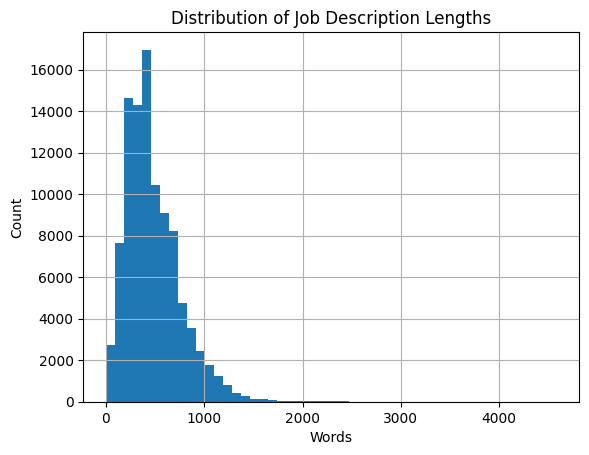

In [34]:
plt.hist(df['descLen'], bins=50)
plt.title("Distribution of Job Description Lengths")
plt.xlabel("Words")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [35]:
df_small = df[df['descLen'] < 10].copy()
df_small.reset_index(drop=True, inplace=True)

In [36]:
df_small.head(20)

,jobTitle,companyName,finalZipcode,finalState,finalCity,companyBranchName,jobDescUrl,nlpBenefits,nlpSkills,nlpSoftSkills,nlpDegreeLevel,nlpEmployment,nlpSeniority,correctDate,scrapedLocation,descRawLen,jobDesc,descLen
0,Registered Nurse - Telemetry,J. Edward Staffing,13790,"NY,",Johnson City,"J. Edward Staffing || Johnson City, NY, 13790",https://www.postjobfree.com/job/vt9f1v/registe...,[],[],[],[],Contract,Mid-Senior level,2025-01-06 00:00:00,"Johnson City, NY, 13790",10,specialty_dept: uhs-st5-oncologyshift_type: da...,9
1,Logistics Office Coordinator (Apply in minutes),"US0344 IFG Jacksonville, Division of Sysco Int...",32205,FL,Jacksonville,"US0344 IFG Jacksonville, Division of Sysco Int...",https://us.jora.com/job/Logistics-Office-Coord...,[],[],[],[],Full-time,Entry level,2025-01-06 14:26:51,"Jacksonville, FL",3,nan,1
2,Mandarin District Sales Manager (Apply in minu...,"US0103 Sysco Asian Foods, Inc.",68132,NE,Omaha,"US0103 Sysco Asian Foods, Inc. || Omaha, NE",https://us.jora.com/job/Mandarin-District-Sale...,[],[],[],[],Full-time,Entry level,2025-01-06 14:30:24,"Omaha, NE",3,nan,1
3,Warehouse Shift Lead - Leadership and Developm...,"US0444 DiTomaso, Division of Sysco Seattle, Inc",99518,AK,Anchorage,"US0444 DiTomaso, Division of Sysco Seattle, In...",https://us.jora.com/job/Warehouse-Shift-Lead-7...,[],[],[],[],Full-time,Mid-Senior level,2025-01-06 15:34:50,"Anchorage, AK",3,nan,1
4,CMA - Full-time 12-hour Day Shift,Anew Healthcare Operations - Easton Llc,66020,KS,Easton,Anew Healthcare Operations - Easton Llc || Eas...,https://www.simplyhired.com/job/De-XVFXcmQsR4h...,[],[],[],[],Full-time,Entry level,2025-01-03 15:12:05,"Easton, KS",6,current ks cna license.,4
5,Warehouse Replenishment Specialist (Apply in m...,"US1601 Coastal Sunbelt Produce, LLC",20376,MD,Laurel,"US1601 Coastal Sunbelt Produce, LLC || Laurel, MD",https://us.jora.com/job/Warehouse-Replenishmen...,[],[],[],[],Full-time,Entry level,2025-01-06 14:28:20,"Laurel, MD",3,nan,1
6,Mandarin District Sales Manager (Apply in minu...,"US0103 Sysco Asian Foods, Inc.",66208,KS,Kansas City,"US0103 Sysco Asian Foods, Inc. || Kansas City, KS",https://us.jora.com/job/Mandarin-District-Sale...,[],[],[],[],Full-time,Entry level,2025-01-06 15:11:55,"Kansas City, KS",3,nan,1
7,Cold Storage Loading Specialist - Nights (Appl...,"US0177 NorthEast Payroll, Division of Sysco Re...",22642,VA,Front Royal,"US0177 NorthEast Payroll, Division of Sysco Re...",https://us.jora.com/job/Cold-Storage-Loading-S...,[],[],[],[],Full-time,Entry level,2025-01-06 17:18:45,"Front Royal, VA",3,nan,1
8,Regional Mandarin Sales Director (Apply in min...,"US0103 Sysco Asian Foods, Inc.",57003,SD,Sioux Falls,"US0103 Sysco Asian Foods, Inc. || Sioux Falls, SD",https://us.jora.com/job/Regional-Mandarin-Sale...,[],[],[],[],Full-time,Director,2025-01-06 15:32:34,"Sioux Falls, SD",3,nan,1
9,Territory Account Manager (Apply in minutes),"US0035 Sysco Eastern Wisconsin, LLC",53130,WI,Milwaukee,"US0035 Sysco Eastern Wisconsin, LLC || Milwauk...",https://us.jora.com/job/Territory-Account-Mana...,[],[],[],[],Full-time,Mid-Senior level,2025-01-06 14:21:32,"Milwaukee, WI",3,nan,1


In [37]:
df = df[df['descLen'] >= 10].copy()
df.reset_index(drop=True, inplace=True)

In [38]:
df['descLen'].describe()

count    99947.000000
mean       481.524518
std        289.141768
min         10.000000
25%        276.000000
50%        415.000000
75%        633.000000
max       4585.000000
Name: descLen, dtype: float64

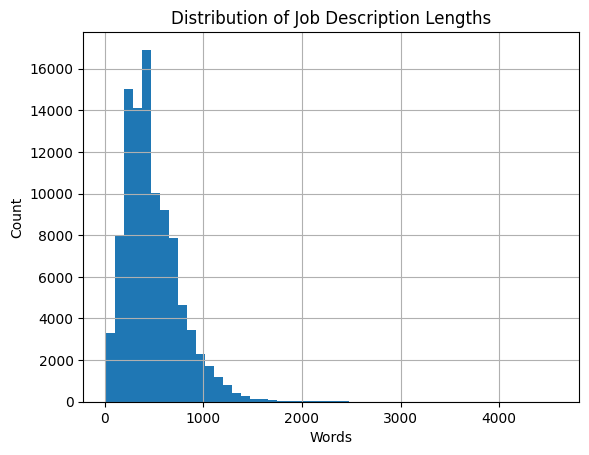

In [39]:
plt.hist(df['descLen'], bins=50)
plt.title("Distribution of Job Description Lengths")
plt.xlabel("Words")
plt.ylabel("Count")
plt.grid(True)
plt.show()